## Converting fluid inclusion densities to depths
- Note, you will have to have CoolProp installed for this to work, if you have python installed through anaconda, conda install -c conda-forge coolprop in the command line normally works well

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf

## Fitting Rasmussen data

In [18]:
ras_sum=pd.read_excel('Rasmussen_Velocities.xlsx', 'Summary')

3.784444149179223
0.2857169093579655


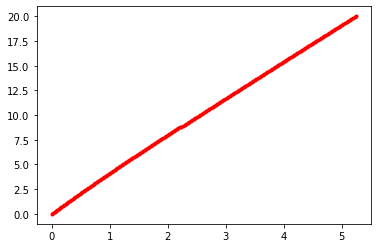

In [37]:
# Overal Profile
plt.plot(ras_sum['Pressure(MPa)']/100, ras_sum['Depth(km)'],
          '.r')

a, b = np.polyfit(ras_sum['Pressure(MPa)']/100, ras_sum['Depth(km)'],  1)
print(a)
print(b)
x=ras_sum['Depth(km)']
#plt.plot(x, a*x + b, '-b')
# Pf_Rasm_overall = np.poly1d(np.polyfit(ras['Depth(km)'], ras['Pressure(MPa)'], 2))
# Px_Rasm_overall = np.linspace(0, 10000, 101)
# Py_Rasm_overall = Pf_Rasm_overal(Px_Rasm_overall)

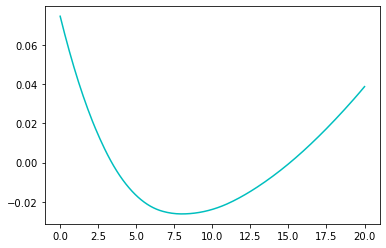

In [26]:
plt.plot(x, ras_sum['Pressure(MPa)']/100-(a*x + b), '-c')


Text(0, 0.5, 'Pressures (MPa)')

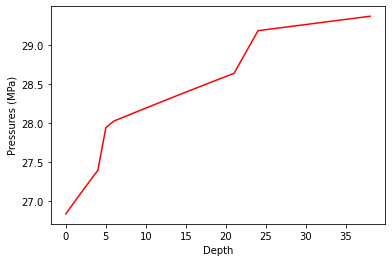

In [6]:
plt.plot(ras['Topoflayer(km)a'].loc[ras['Profile#']==1],
         0.01*ras['ρ(kg/m3)b'].loc[ras['Profile#']==1],
         '-r')
plt.xlabel('Depth')
plt.ylabel('Pressures (MPa)')

In [39]:
def rasmussen(P_kbar):
    """ Linear fit to the supporting information of Rasmussen et al. 2022, 
    overall best fit density vs. depth"""
    P=P_kbar
    D=3.784444149179223*P+0.2857169093579655
    return D
    
def hill_zucca(P_kbar):
    """ Parameterization of Hill and Zucca (1987),
    as given in Putirka (2017) Down the Crater Elements supplement
    """
    P=P_kbar
    
    D=-2.77*10**(-5) * (P**4) - 2.0*10**(-3)*(P**3) - 4.88*10**(-2)*P**2 + 3.6*P - 6.34*(10**(-2))
    
    return D

def ryan_lerner(P_kbar):
    """ Parameterization of Ryan 1987, actual equation from Lerner et al. 2021
    After 16.88 km (455 MPa), assume density is 2.746, as density turns around again. This profile is tweaked for Hawaii
    """
    P=P_kbar*100
    if P<455.09090909:
        D=(4.578*10**(-8) *P**3) - (4.151*10**(-5) *P**2) + (4.652*10**(-2) *P)
    else:
        D=P/(9.8*2.749643038642074)    
    
    return D

def mavko_debari(P_kbar):
    """ Parameterization of Mavko and Thompson (1983) and DeBari and Greene (2011) 
    as given in Putirka (2017) Down the Crater Elements supplement
    """ 
    P=P_kbar
    D=2.4*(10**4)*(P**3) - 2.11*(10**2)*P**2 + 3.66*P+ 0.46
    print('not working yet, obvious typo, have asked keith')
    
    return D


def prezzi(P_kbar):
    """ Parameterization of Prezzi et al. (2009), 
    as given in Putirka (2017) Down the Crater Elements supplement.
    Tweaked for Andes.
    """     
    P=P_kbar
    D=4.88 + 3.30*P - 0.0137*(P - 18.01)**2
    
    return D
    
    
Profile_funcs={ryan_lerner, mavko_debari, hill_zucca, prezzi, rasmussen}
Profile_funcs_by_name= {p.__name__: p for p in Profile_funcs}

def convert_pressure_to_depth(P_kbar=None, model="ryan_lerner"):
    """ Converts pressure in kbar to depth in km using a variety of crustal density profiles
    

    Parameters
    -----------

    P_kbar: int, float, pd.Series, np.ndarray
        Pressure in kbar
        
    model: str, choose from
        ryan_lerner: Parameterization of Ryan 1987, actual equation from Lerner et al. 2021
    After 16.88 km (455 MPa), assume density is 2.746, as density turns around again. This profile is tweaked for Hawaii
    
        mavko_debari: Parameterization of Mavko and Thompson (1983) and DeBari and Greene (2011) 
    as given in Putirka (2017) Down the Crater Elements supplement
    
        hill_zucca: Parameterization of Hill and Zucca (1987),
    as given in Putirka (2017) Down the Crater Elements supplement
    
        prezzi: Parameterization of Prezzi et al. (2009), 
    as given in Putirka (2017) Down the Crater Elements supplement. Tweaked for Andes. 
    
        rasmussen: Linear fit to the supporting information of Rasmussen et al. 2022, 
    overall best fit density vs. depth
    
    
    
    """
    
    try:
        func = Profile_funcs_by_name[model]
    except KeyError:
        raise ValueError(f'{model} is not a valid model') from None
    #sig=inspect.signature(func)    
    if isinstance(P_kbar, float) or isinstance(P_kbar, int):
        D=func(P_kbar)
        
    if isinstance(P_kbar, pd.Series):
        D=np.empty(len(P_kbar), float)
        for i in range(0, len(P_kbar)):
            D[i]=func(P_kbar.iloc[i])
            
    if isinstance(P_kbar, np.ndarray):
        D=np.empty(len(P_kbar), float)
        for i in range(0, len(P_kbar)):
            D[i]=func(P_kbar[i])        
            
        
    return D
    

In [50]:
P_array=np.linspace(0.001, 10, 10)
ryan_lerner=convert_pressure_to_depth(P_kbar=P_array,
                                      model="ryan_lerner")

mavko_debari=convert_pressure_to_depth(P_kbar=P_array,
                                      model="mavko_debari")

prezzi=convert_pressure_to_depth(P_kbar=P_array,
                                      model="prezzi")

rasmussen=convert_pressure_to_depth(P_kbar=P_array,
                                      model="rasmussen")


hill_zucca=convert_pressure_to_depth(P_kbar=P_array,
                                      model="hill_zucca")



not working yet, obvious typo, have asked keith
not working yet, obvious typo, have asked keith
not working yet, obvious typo, have asked keith
not working yet, obvious typo, have asked keith
not working yet, obvious typo, have asked keith
not working yet, obvious typo, have asked keith
not working yet, obvious typo, have asked keith
not working yet, obvious typo, have asked keith
not working yet, obvious typo, have asked keith
not working yet, obvious typo, have asked keith


In [51]:
prezzi

array([ 0.44006009,  4.63766907,  8.80145764, 12.93142583, 17.02757362,
       21.08990101, 25.11840801, 29.11309461, 33.07396082, 37.00100663])

In [52]:
mavko_debari

array([4.63473000e-01, 3.27445054e+04, 2.62617017e+05, 8.87089609e+05,
       2.10363389e+06, 4.10972148e+06, 7.10282398e+06, 1.12804130e+07,
       1.68399602e+07, 2.39789371e+07])

Text(0, 0.5, 'Density g/cm3')

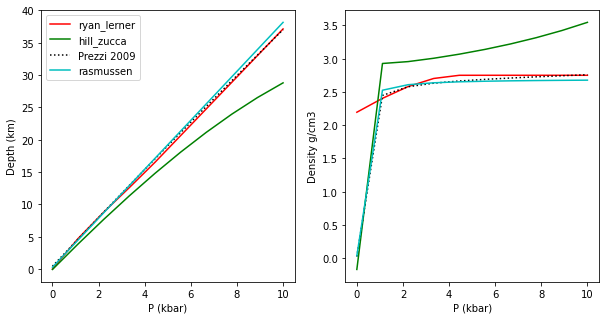

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(P_array, ryan_lerner, '-r', label='ryan_lerner')
#plt.plot(P_array, mavko_debari, '-b')
ax1.plot(P_array, hill_zucca, '-g', label='hill_zucca')
ax1.plot(P_array, prezzi, ':k', label='Prezzi 2009')
ax1.plot(P_array, rasmussen, '-c', label='rasmussen')
ax1.legend()
ax1.set_xlabel('P (kbar)')
ax1.set_ylabel('Depth (km)')

## and showing density vs. pressure

ax2.plot(P_array, 100*P_array/(9.8*ryan_lerner), '-r', label='ryan_lerner')
#plt.plot(P_array, mavko_debari, '-b')
ax2.plot(P_array, 100*P_array/(9.8*hill_zucca), '-g', label='hill_zucca')
ax2.plot(P_array, 100*P_array/(9.8*prezzi), ':k', label='Prezzi 2009')
ax2.plot(P_array, 100*P_array/(9.8*rasmussen), '-c', label='rasmussen')
ax2.set_xlabel('P (kbar)')
ax2.set_ylabel('Density g/cm3')

In [79]:
## Crustal density profiles
def ryan_lerner_density_profile(P_kbar):

    """ Parameterization of Ryan 1987, actual equation from Lerner et al. 2021
    After 16.88 km ( assume density is 2.746, as density turns around again
    
    This profile is tweaked for Hawaii
    """
    
    if isinstance(P_kbar, float) or isinstance(P_kbar, int):
        P=P_kbar*100
        if P<455.09090909:
            D=(4.578*10**(-8) *P**3) - (4.151*10**(-5) *P**2) + (4.652*10**(-2) *P)
        else:
            D=P/(9.8*2.749643038642074)
    if isinstance(P_kbar, pd.Series):
        D=np.empty(len(P_kbar), float)
        for i in range(0, len(P_kbar)):
            P=P_kbar.iloc[i]*100
            if P<455.09090909:
                D[i]=(4.578*10**(-8) *P**3) - (4.151*10**(-5) *P**2) + (4.652*10**(-2) *P)
            else:
                D[i]=P/(9.8*2.749643038642074)
            
            
    if isinstance(P_kbar, np.ndarray):
        D=np.empty(len(P_kbar), float)
        for i in range(0, len(P_kbar)):
            
            P=P_kbar[i]*100
            if P<455.09090909:
                D[i]=(4.578*10**(-8) *P**3) - (4.151*10**(-5) *P**2) + (4.652*10**(-2) *P)
            else:
                D[i]=P/(9.8*2.749643038642074)            

        
    return D

In [80]:
type(FIs['Corrected_Splitting'])

pandas.core.series.Series

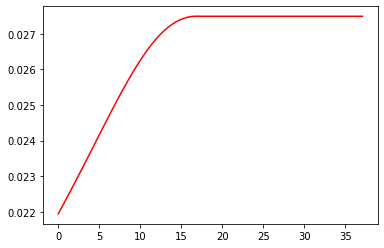

In [82]:
P=np.linspace(0.001, 10, 100)
D=ryan_lerner_density_Profile(P_kbar=P)
plt.plot(D, P/(9.8*D), '-r')
plt.xlabel('Depth (km)')
plt.ylabel('Density')

In [14]:
# Pressure = rho * g * h

In [21]:
P[P/(9.8*D)==max(P/(9.8*D))]

array([455.09090909])

In [20]:
max(P/(9.8*D))

2.749643038642074

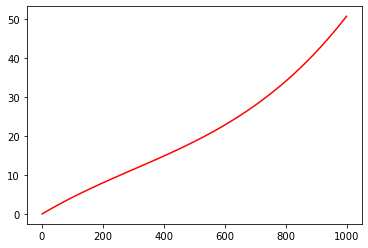

In [22]:
plt.plot( P, D, '-r')

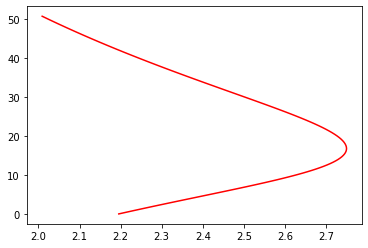

In [15]:
plt.plot( P/(9.8*D), D, '-r')

## First, just calculate densities

In [3]:
Densities=pf.convert_density_depth_Coolprop(T_K=FIs['T_K'], 
                                   Crust_dens_gcm3=2.7,
                CO2_dens_gcm3=FIs['Density_g_cm3'], output='df')
Densities.head()

,Pressure (kbar),Pressure (MPa),Depth (km),input_Crust_dens_gcm3,input_T_K,input_CO2_dens_gcm3
0,0.543676,54.367617,2.052615,2.7,1200,0.21
1,0.250673,25.067256,0.946398,2.7,1250,0.10
2,0.117496,11.749641,0.443600,2.7,1210,0.05
3,1.607466,160.746622,6.068887,2.7,1300,0.45
4,2.822458,282.245803,10.656013,2.7,1410,0.60


## Monte Carlo Simulations for each FI

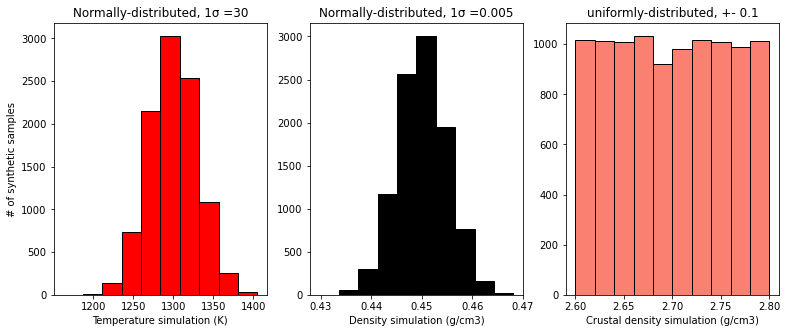

In [5]:
df_synthetic=pf.calculate_temperature_density_MC(df=FIs, sample_i=3,
crust_dens_gcm3=2.7, N_dup=10000,
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
error_CO2_dens=0.005, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_crust_dens=0.1, error_type_crust_dens='Abs', error_dist_crust_dens='uniform' )


df_synthetic.head()

plt.savefig('Distributions.png', dpi=300)

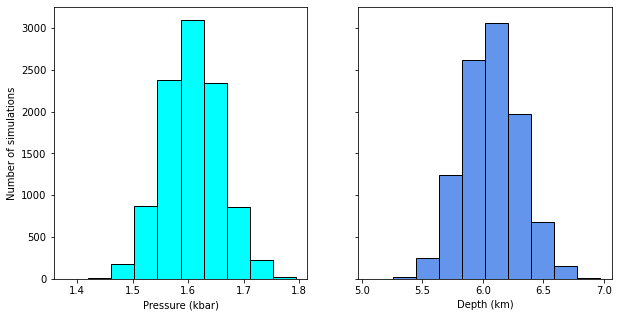

In [6]:
MC_T=pf.convert_density_depth_Coolprop(T_K=df_synthetic['T_K_with_noise'], 
                                    CO2_dens_gcm3=df_synthetic['CO2_dens_with_noise'], 
                                   Crust_dens_gcm3=df_synthetic['crust_dens_with_noise'],
                                     output='df')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5), sharey=True)
ax1.hist(MC_T['Pressure (kbar)'], color='cyan', ec='k')
ax2.hist(MC_T['Depth (km)'], color='cornflowerblue', ec='k')
ax1.set_xlabel('Pressure (kbar)')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('Number of simulations')
plt.savefig('Distribution_Press.png', dpi=300)

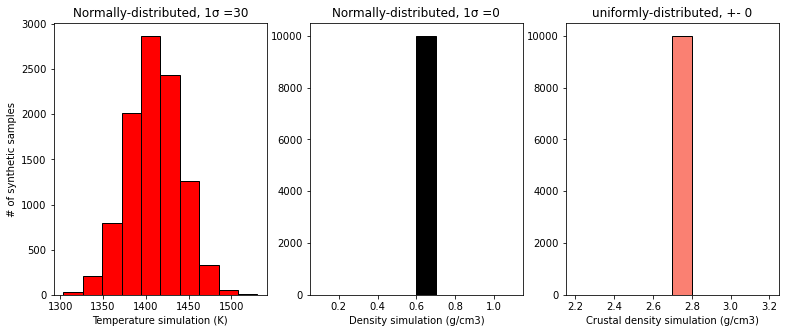

In [17]:
df_synthetic=pf.calculate_temperature_density_MC(df=FIs, sample_i=4,
crust_dens_gcm3=2.7, N_dup=10000,
error_T_K=30, error_type_T_K='Abs', error_dist_T_K='normal',
error_CO2_dens=0, error_type_CO2_dens='Abs', error_dist_CO2_dens='normal',
error_crust_dens=0, error_type_crust_dens='Abs', error_dist_crust_dens='uniform' )


df_synthetic.head()

plt.savefig('Distributions.png', dpi=300)

In [18]:
MC_T=pf.convert_density_depth_Coolprop(T_K=df_synthetic['T_K_with_noise'], 
                                    CO2_dens_gcm3=df_synthetic['CO2_dens_with_noise'], 
                                   Crust_dens_gcm3=df_synthetic['crust_dens_with_noise'],
                                     output='df')

Text(0, 0.5, 'Temperature (K)')

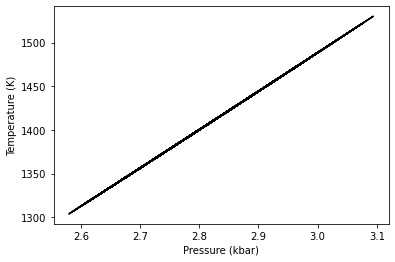

In [19]:
plt.plot(MC_T['Pressure (kbar)'], MC_T['input_T_K'], '-k')
plt.xlabel('Pressure (kbar)')
plt.ylabel('Temperature (K)')

In [12]:
MC_T

,Pressure (kbar),Pressure (MPa),Depth (km),input_Crust_dens_gcm3,input_T_K,input_CO2_dens_gcm3
0,1.547467,154.746694,5.842364,2.7,1258.490130,0.45
1,1.604336,160.433590,6.057069,2.7,1297.830666,0.45
2,1.552626,155.262587,5.861841,2.7,1262.053405,0.45
3,1.570392,157.039205,5.928916,2.7,1274.333033,0.45
4,1.573312,157.331188,5.939940,2.7,1276.352418,0.45
...,...,...,...,...,...,...
9995,1.620782,162.078239,6.119162,2.7,1309.232663,0.45
9996,1.699957,169.995682,6.418080,2.7,1364.273252,0.45
9997,1.631579,163.157866,6.159922,2.7,1316.723420,0.45
9998,1.608099,160.809946,6.071278,2.7,1300.438890,0.45
